# CASE STUDY - REGRESSION
## Real Estate

## Get the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ls

Midterm_Project_Regression_Final.ipynb  Midterm_project_experiment.ipynb


In [3]:
cd

/Users/vonate


In [4]:
cd Documents

/Users/vonate/Documents


In [5]:
cd Github

/Users/vonate/Documents/Github


In [6]:
cd Ironhack

/Users/vonate/Documents/Github/Ironhack


In [7]:
cd midterm_project_regression

/Users/vonate/Documents/Github/Ironhack/midterm_project_regression


In [8]:
cd data

/Users/vonate/Documents/Github/Ironhack/midterm_project_regression/data


In [9]:
df=pd.read_excel('regression_data.xls')

### EDA - Exploring the date-set

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [11]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


### Data cleaning

In [12]:
# Checking for the nulls 
df.isnull().sum()


id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [13]:
# checking for dublicates 
df.duplicated().sum()

0

In [14]:
# checking for dublicate id 
df['id'].value_counts()

795000620     3
1568100300    2
2892700041    2
1450100390    2
3395040550    2
             ..
2595650170    1
7212651100    1
9808700025    1
6772200055    1
2424410110    1
Name: id, Length: 21420, dtype: int64

In [15]:
# searching for how many repeated id we have in total 
(df['id'].value_counts() >1).sum()


176

In [16]:
# This house has been sold twice at different prices on different dates 
# We are not going to drop it as it's not a problem
df[df['id'] == 1568100300]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
9105,1568100300,2014-09-17,6,4.5,3500,8504,2.0,0,0,3,...,3500,0,1980,0,98155,47.7351,-122.295,1550,8460,350000
9106,1568100300,2015-01-21,6,4.5,3500,8504,2.0,0,0,3,...,3500,0,1980,0,98155,47.7351,-122.295,1550,8460,682500


In [17]:
# Changing the format of the date for facilitating use of this feature in the process 
df['date'] = pd.to_datetime(df['date']).dt.date
df['date']= df['date'].apply(lambda x: x.toordinal())
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,735519,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,735576,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,735654,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,735576,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,735647,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [18]:
df.dtypes

id                 int64
date               int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

### EDA - Exploring the data

In [19]:
# Checking for correlation
df.corr()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,1.000000,0.005385,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,...,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.016772
date,0.005385,1.000000,-0.016523,-0.034236,-0.034276,0.006337,-0.022333,0.001365,-0.001726,-0.050883,...,-0.027638,-0.019407,-0.000279,-0.024494,0.001605,-0.032485,-0.007228,-0.031198,0.002589,-0.003998
bedrooms,0.001150,-0.016523,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,...,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.308787
bathrooms,0.005162,-0.034236,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,...,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303,0.525906
sqft_living,-0.012241,-0.034276,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,...,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342,0.701917
sqft_lot,-0.131911,0.006337,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,...,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.089876
floors,0.018608,-0.022333,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,...,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.256804
waterfront,-0.002727,0.001365,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,...,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781,0.266398
view,0.011536,-0.001726,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,...,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904,0.397370
condition,-0.023803,-0.050883,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,...,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.036056


In [20]:
# Using correlation matrix to find highly correlated features with price also identifying highly correlated features with each other 
corr_matrix = df.corr()

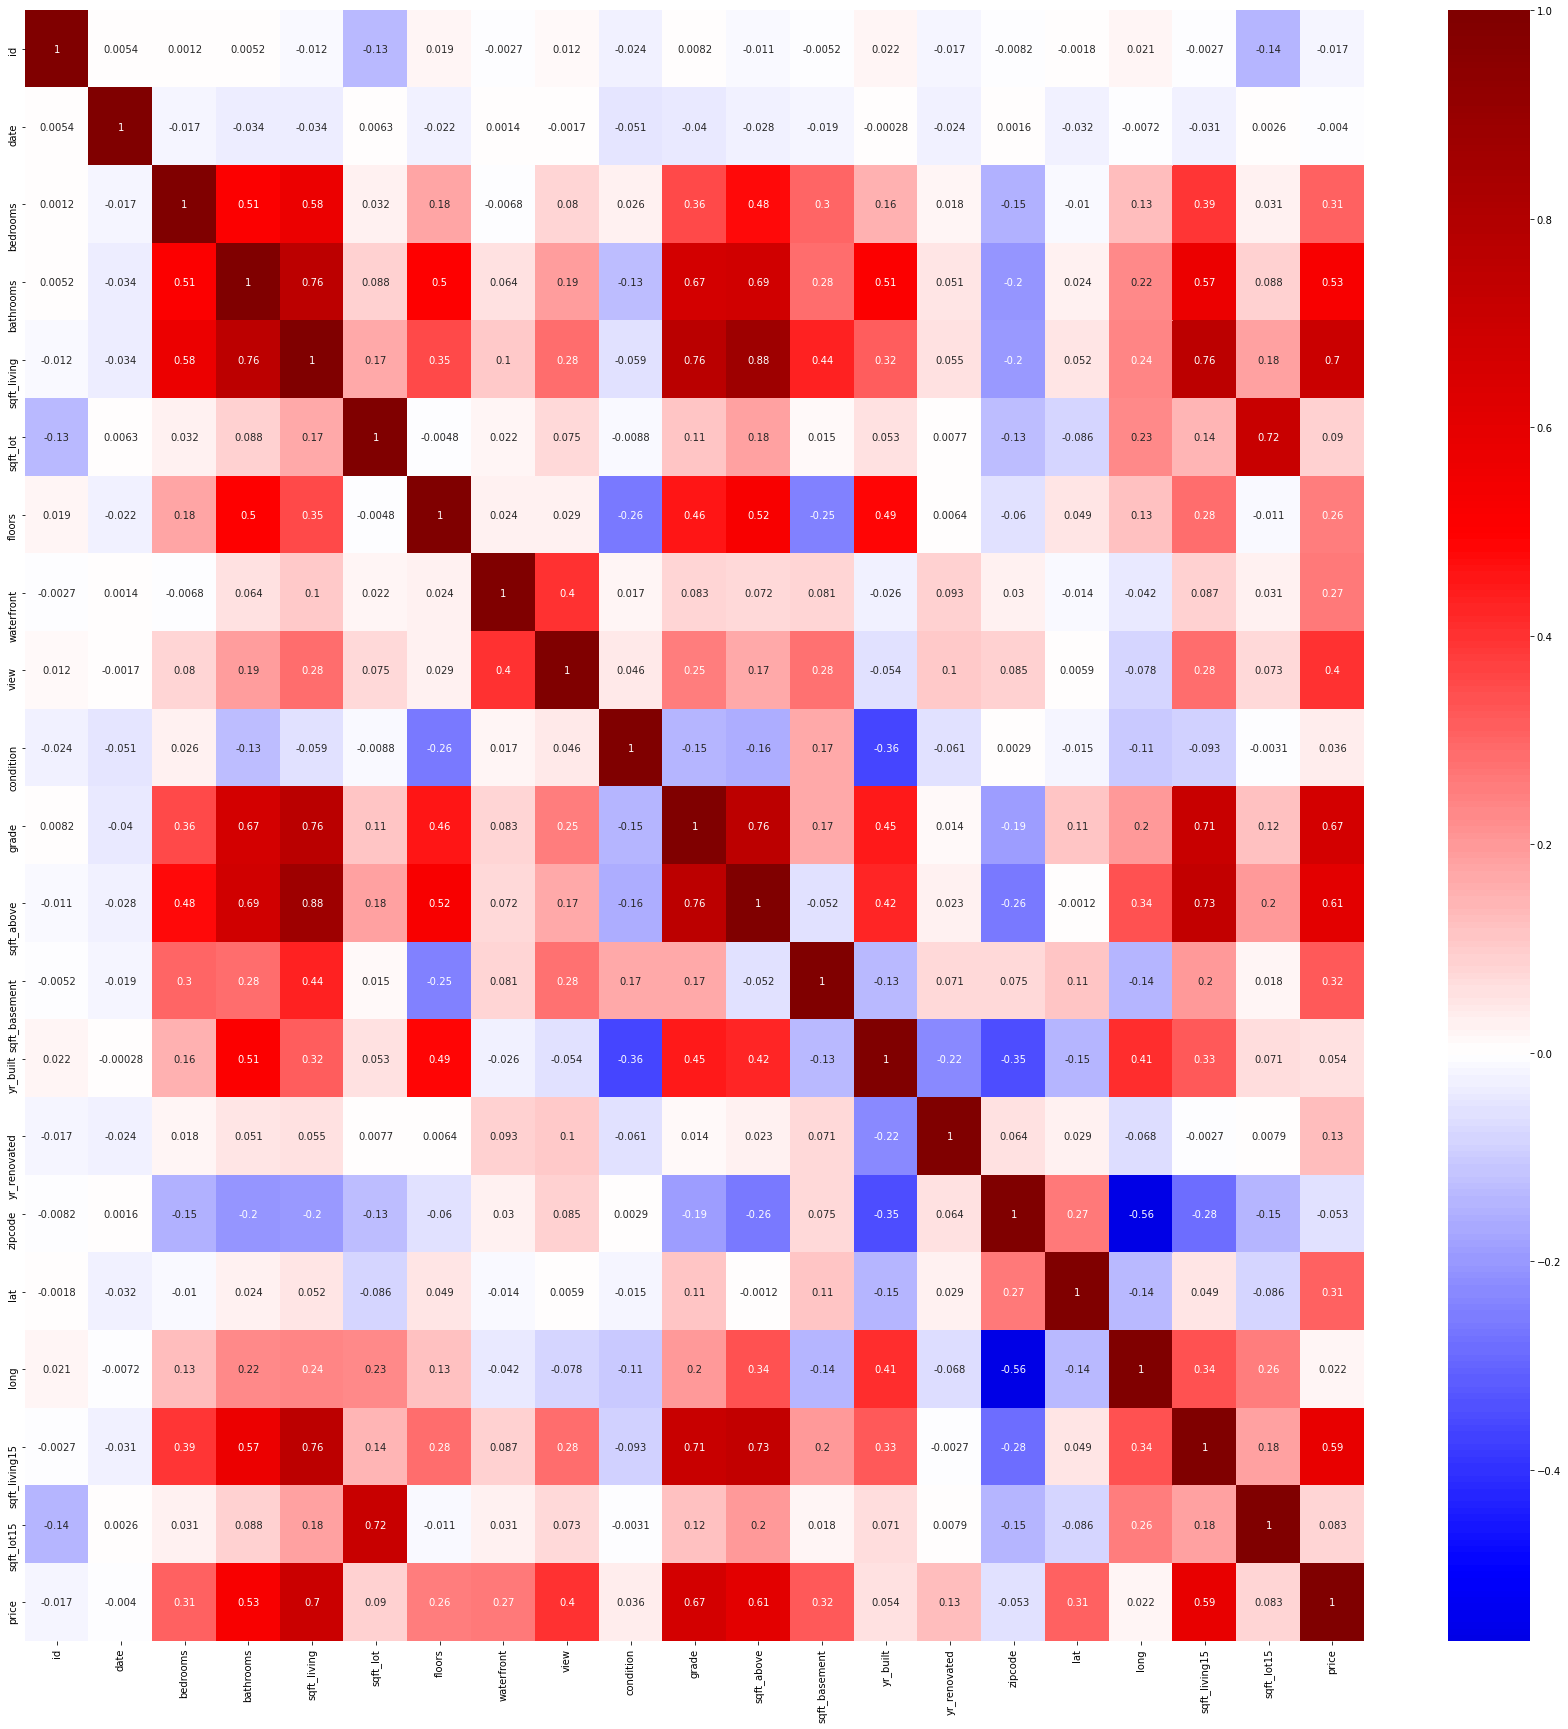

In [21]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(corr_matrix,
           cmap='seismic',
           center=0,
           annot=True,
           );

### Linear Regression First Model


In [22]:
#import the model from sklearn
from sklearn import linear_model
#import evaluation metrics from sklearn
from sklearn.metrics import mean_squared_error,r2_score
#import TTsplit from sklearn
from sklearn.model_selection import train_test_split
#import linearregregression
from sklearn.linear_model import LinearRegression

In [23]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,735519,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,735576,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,735654,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,735576,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,735647,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,735374,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,735652,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,735407,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,735614,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [24]:
y=df['price'] # DEPENDENT VAR/LABEL
X=df.drop(['price'], axis=1) # INDEPENDENT VAR/LABEL
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (21597, 20)
y shape: (21597,)


In [25]:
# 60% of the data to the train and 40% to the test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=40)

In [26]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [27]:
y_pred= lm.predict(X_test)

In [28]:
r2_score(y_test, y_pred)

0.7037256930741821

In [29]:
# Dropping long and lat because we have the zipcode
df = df.drop(['lat', 'long'], axis=1)

In [30]:
# They are highly correlated with other features and they mean the same thing so we drop them to increase the accuracy of the model 
df = df.drop(['sqft_lot', 'sqft_living'], axis=1)

In [31]:
df.reset_index(drop=True, inplace=True)
df

,id,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,7129300520,735519,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900
1,6414100192,735576,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,5631500400,735654,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000
3,2487200875,735576,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000
4,1954400510,735647,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,735374,3,2.50,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,360000
21593,6600060120,735652,4,2.50,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,400000
21594,1523300141,735407,2,0.75,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,402101
21595,291310100,735614,3,2.50,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,400000


In [32]:
df.index

RangeIndex(start=0, stop=21597, step=1)

In [33]:
df.describe()

,id,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,735535.180997,3.373200,2.115826,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,113.059987,0.926299,0.768984,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,735355.000000,1.000000,0.500000,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,735436.000000,3.000000,1.750000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,735522.000000,3.000000,2.250000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,735646.000000,4.000000,2.500000,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,735745.000000,33.000000,8.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000,7.700000e+06


In [34]:
df = df.drop(['id'], axis=1)

### Standardization & Scaling

In [35]:
#Changing the data type of some of the features to object and preparing them for preprocessing 

df[['bedrooms', 'bathrooms', 
    'floors', 'waterfront', 
    'view', 'condition', 
    'grade', 'zipcode']] = df[['bedrooms', 'bathrooms', 
                               'floors', 'waterfront', 'view',
                               'condition', 'grade', 'zipcode']].astype(object)



In [36]:
# Get the numeric data excluding the price
num = df._get_numeric_data()
Xnum = num.drop(columns=['price'])

In [37]:
Xnum

,date,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,735519,1180,0,1955,0,1340,5650
1,735576,2170,400,1951,1991,1690,7639
2,735654,770,0,1933,0,2720,8062
3,735576,1050,910,1965,0,1360,5000
4,735647,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...
21592,735374,1530,0,2009,0,1530,1509
21593,735652,2310,0,2014,0,1830,7200
21594,735407,1020,0,2009,0,1020,2007
21595,735614,1600,0,2004,0,1410,1287


In [38]:
# Using standard-scaler 
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(Xnum)
Xstd = transformer.transform(Xnum)
print(Xstd.shape)

(21597, 7)


In [39]:
Xcat = df.select_dtypes(include = np.object)
Xcat

<ipython-input-39-8a2b57641c80>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Xcat = df.select_dtypes(include = np.object)


,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode
0,3,1.0,1.0,0,0,3,7,98178
1,3,2.25,2.0,0,0,3,7,98125
2,2,1.0,1.0,0,0,3,6,98028
3,4,3.0,1.0,0,0,5,7,98136
4,3,2.0,1.0,0,0,3,8,98074
...,...,...,...,...,...,...,...,...
21592,3,2.5,3.0,0,0,3,8,98103
21593,4,2.5,2.0,0,0,3,8,98146
21594,2,0.75,2.0,0,0,3,7,98144
21595,3,2.5,2.0,0,0,3,8,98027


In [40]:
# Encoding the categorical features for concatenating 
from sklearn.preprocessing import OneHotEncoder
X_enc = OneHotEncoder(handle_unknown='error', drop='first').fit(Xcat)
X_enc = X_enc.transform(Xcat).toarray()
X_enc

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [41]:
X = np.concatenate((Xstd, X_enc), axis= 1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

### Linear Regression Second Model

In [43]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)
Y_pred  = lm.predict(X_test)

In [44]:
r2_score(y_test, Y_pred)

0.8437279523974432